In [56]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [60]:
#선형회귀(최소제곱법): 실제와 예상값의 잔차의 합이 최소가 되도록 만드는 모델(y=mx+b)
#독립/종속변수 설정(원인(X), 결과(y))
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values
X.shape ,y.shape

((22, 1), (22,))

In [61]:
#모델변수명reg - 모델 객체 생성
reg = LinearRegression()
reg.fit(X,y) #학습

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
#예측 - 9시간공부시 점수예측
pred = reg.predict([[9]])
print(pred[0], pred, pred.shape)

87.50951711379335 [87.50951711] (1,)


In [63]:
#8,7,5시간 공부시 점수예측
pred = reg.predict([[8],[7],[5]])
print(pred.shape, pred[0],pred[1],pred[2], pred)

(3,) 79.56490004438926 71.62028297498517 55.731048836176996 [79.56490004 71.62028297 55.73104884]


In [64]:
#Xticks설정
import math
import numpy as np
max = math.ceil(X.max()) #올림-ceil/ 버림- Floor, 정수변경-int사용
# xticks = [x for x in range(max+1)] #정수로 사용시
xticks = [x for x in np.arange(0,max+1,0.5)] #0.5단위
xticks

[np.float64(0.0),
 np.float64(0.5),
 np.float64(1.0),
 np.float64(1.5),
 np.float64(2.0),
 np.float64(2.5),
 np.float64(3.0),
 np.float64(3.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0),
 np.float64(5.5),
 np.float64(6.0),
 np.float64(6.5),
 np.float64(7.0),
 np.float64(7.5),
 np.float64(8.0),
 np.float64(8.5),
 np.float64(9.0),
 np.float64(9.5),
 np.float64(10.0),
 np.float64(10.5),
 np.float64(11.0),
 np.float64(11.5)]

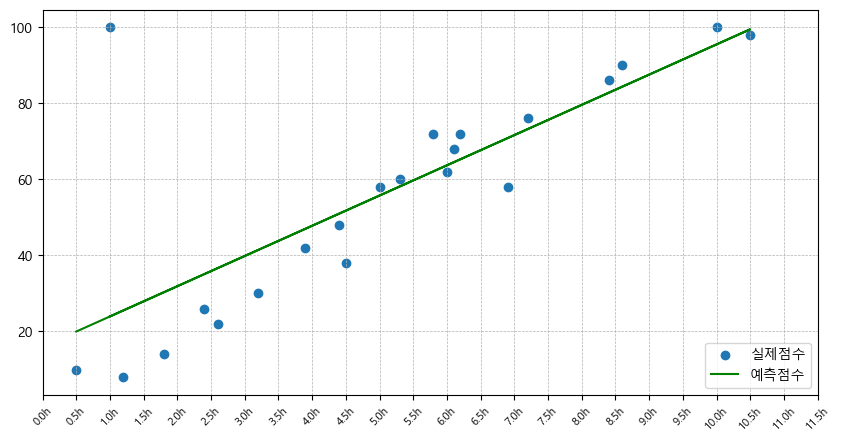

In [65]:
#실제점수와 예측점수를 시각화
plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')
plt.plot(X, reg.predict(X), color='g', label='예측점수')
plt.grid(True, ls='--', lw=0.5)
plt.xticks(xticks, [f'{x}h' for x in xticks], size=8, rotation=45)
plt.legend()
plt.show()

In [66]:
#y = mx+b
m = reg.coef_ #기울기
b = reg.intercept_ #y절편
y1 = m*9+b #9시간 공부시 성적
y1

array([87.50951711])

In [67]:
reg.predict([[9]])

array([87.50951711])

In [68]:
#선형회귀-경사하강법-노이즈데이터가 있을때 
from sklearn.linear_model import SGDRegressor

In [69]:
X.shape, y.shape

((22, 1), (22,))

In [70]:
#경사하강법 모델변수명sr - 모델 객체 생성
sr = SGDRegressor()
sr.fit(X,y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [71]:
#예측 - 9시간공부시 점수예측
pred2 = sr.predict([[9]])
print(pred2[0], pred2, pred2.shape)

90.29860894918082 [90.29860895] (1,)


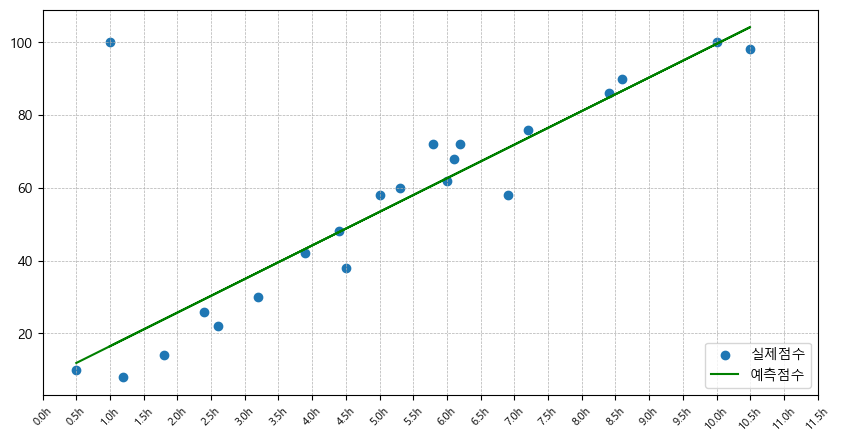

In [72]:
max = math.ceil(X.max()) #올림-ceil/ 버림- Floor, 정수변경-int사용
# xticks = [x for x in range(max+1)] #정수로 사용시
xticks = [x for x in np.arange(0,max+1,0.5)] #0.5단위
xticks

plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')
plt.plot(X, sr.predict(X), color='g', label='예측점수')
plt.grid(True, ls='--', lw=0.5)
plt.xticks(xticks, [f'{x}h' for x in xticks], size=8, rotation=45)
plt.legend()
plt.show()

In [73]:
#비교 1에 가까울수록 좋은 모델
sr.score(X,y), reg.score(X,y)

(0.5682157008389643, 0.5896028693137483)

In [74]:
sr.coef_, reg.coef_,sr.intercept_, reg.intercept_

(array([9.22533887]),
 array([7.94461707]),
 array([7.27055911]),
 np.float64(16.007963489156545))

In [75]:
#옵션으로 경사하강법 생성 max_iter:하강횟수, eta0=증감폭, randomstate=0(같은값),verdose(반복과정체크)
sr = SGDRegressor(max_iter=1500, eta0=0.0001, random_state=0, verbose=1)
sr.fit(X,y)

-- Epoch 1
Norm: 0.42, NNZs: 1, Bias: 0.068941, T: 22, Avg. loss: 1923.504719
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.72, NNZs: 1, Bias: 0.117862, T: 44, Avg. loss: 1804.001484
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 1, Bias: 0.159928, T: 66, Avg. loss: 1712.422791
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 1, Bias: 0.197451, T: 88, Avg. loss: 1633.991026
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 1, Bias: 0.231958, T: 110, Avg. loss: 1564.879431
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 1, Bias: 0.264029, T: 132, Avg. loss: 1502.274723
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 1, Bias: 0.294202, T: 154, Avg. loss: 1445.211057
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.97, NNZs: 1, Bias: 0.322722, T: 176, Avg. loss: 1392.617425
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.14, NNZs: 1, Bias: 0.349850, T: 198, Avg. loss: 1344.011991
Total trainin

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1500
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


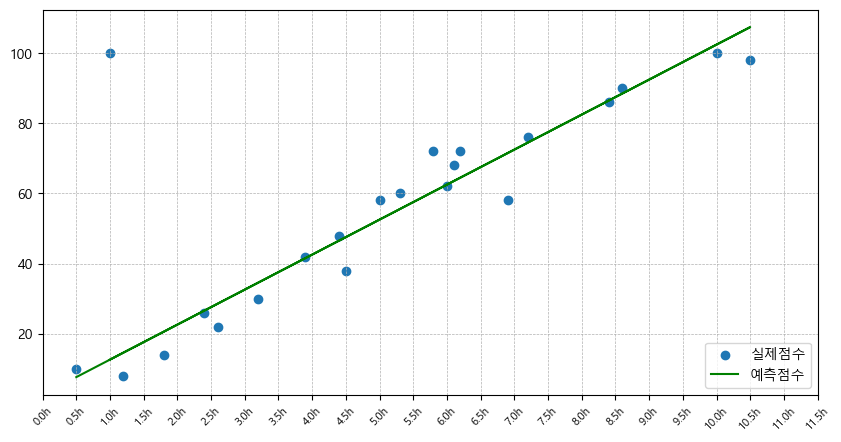

In [76]:
max = math.ceil(X.max()) #올림-ceil/ 버림- Floor, 정수변경-int사용
# xticks = [x for x in range(max+1)] #정수로 사용시
xticks = [x for x in np.arange(0,max+1,0.5)] #0.5단위
xticks

plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')
plt.plot(X, sr.predict(X), color='g', label='예측점수')
plt.grid(True, ls='--', lw=0.5)
plt.xticks(xticks, [f'{x}h' for x in xticks], size=8, rotation=45)
plt.legend()
plt.show()

In [77]:
#함수로 정리
def model_sgd(iter, eta0):
    sr = SGDRegressor(max_iter=iter, eta0=eta0, random_state=0)
    sr.fit(X,y)
    plt.figure(figsize=(10,5))
    plt.scatter(X,y, label='실제점수')
    plt.plot(X, sr.predict(X), color='g', label='예측점수')
    plt.grid(True, ls='--', lw=0.5)
    # plt.xticks(xticks, [f'{x}h' for x in xticks], size=8, rotation=45)
    plt.title(f'iter={i}',size=20)
    plt.legend()
    plt.show()
    plt.close

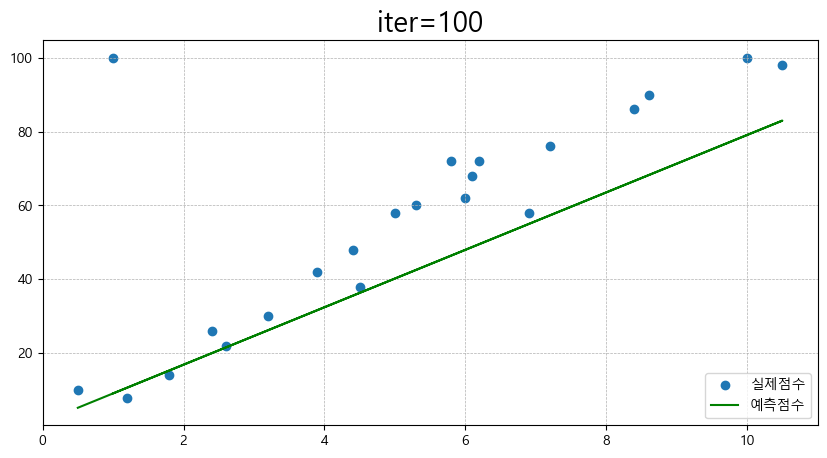

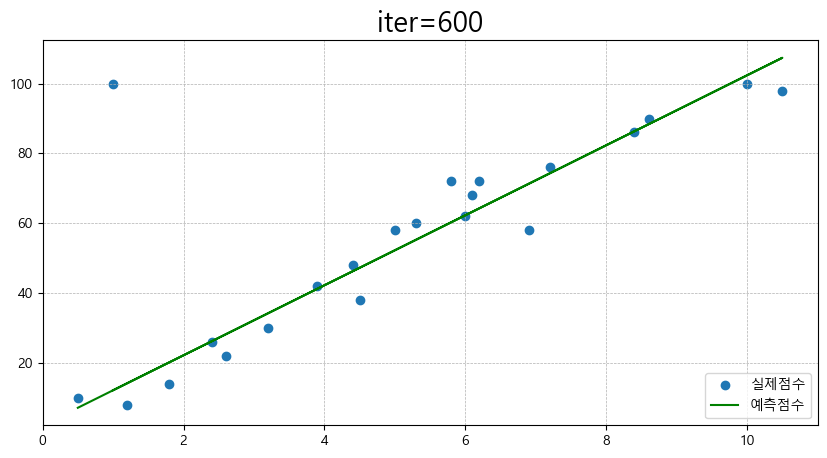

In [78]:
import time
for i in range(100, 1001, 500):
    model_sgd(i, 0.0001)
    time.sleep(3)

In [79]:
#훈련/테스트셋분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [80]:
X_train.shape, X_test.shape, X.shape

((17, 1), (5, 1), (22, 1))

In [81]:
sr = SGDRegressor()
sr.fit(X_train,y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [82]:
sr.predict(X_test), X_test

(array([101.87204024,  57.08904486,  64.83994791,  63.97873646,
         21.77937544]),
 array([[10.5],
        [ 5.3],
        [ 6.2],
        [ 6.1],
        [ 1.2]]))